In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('/content/Advertising.csv')
print(df.head())
print(df.tail())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
     Unnamed: 0     TV  Radio  Newspaper  Sales
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400

In [4]:
print(df.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [5]:
print("The duplicate values in the data",df.duplicated().sum())

The duplicate values in the data 0


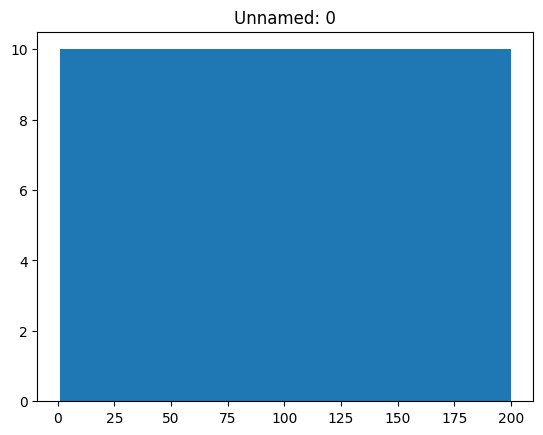

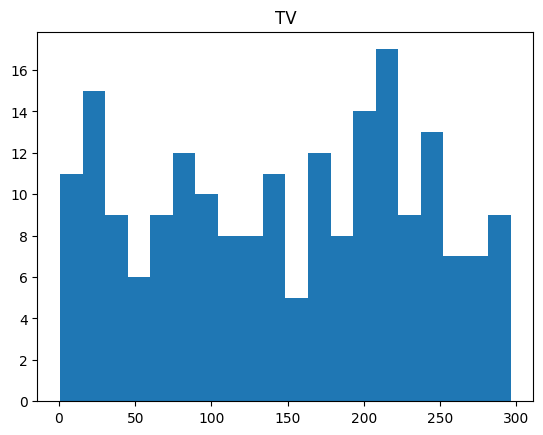

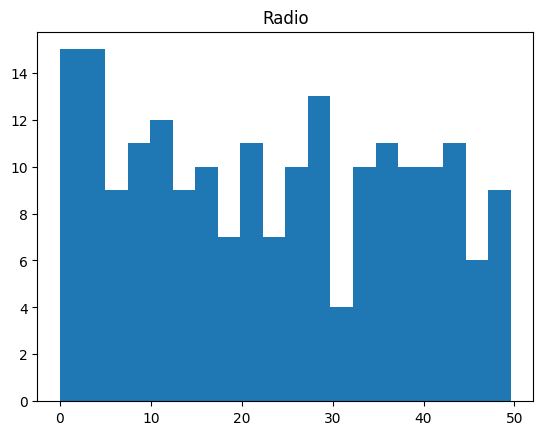

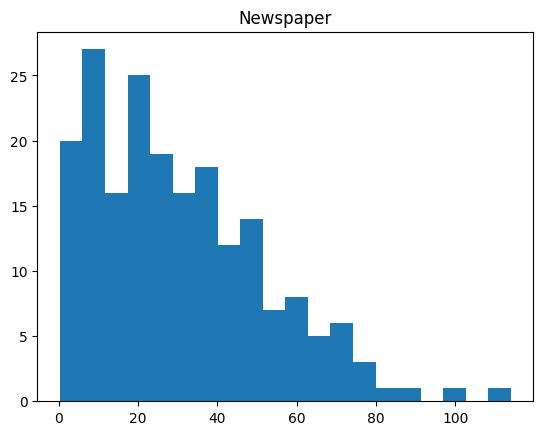

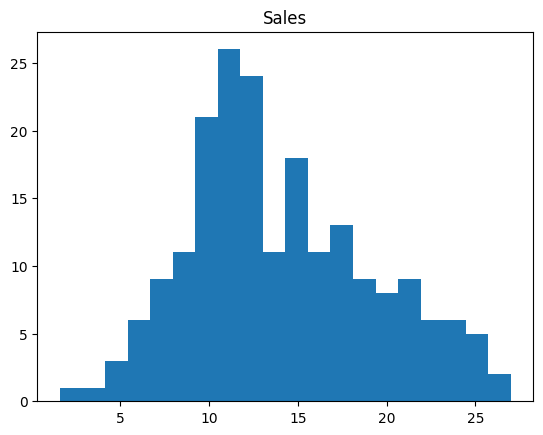

In [6]:
for col in df.columns:
 plt.hist(df[col],bins=20)

 plt.title(col)
 plt.show()

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


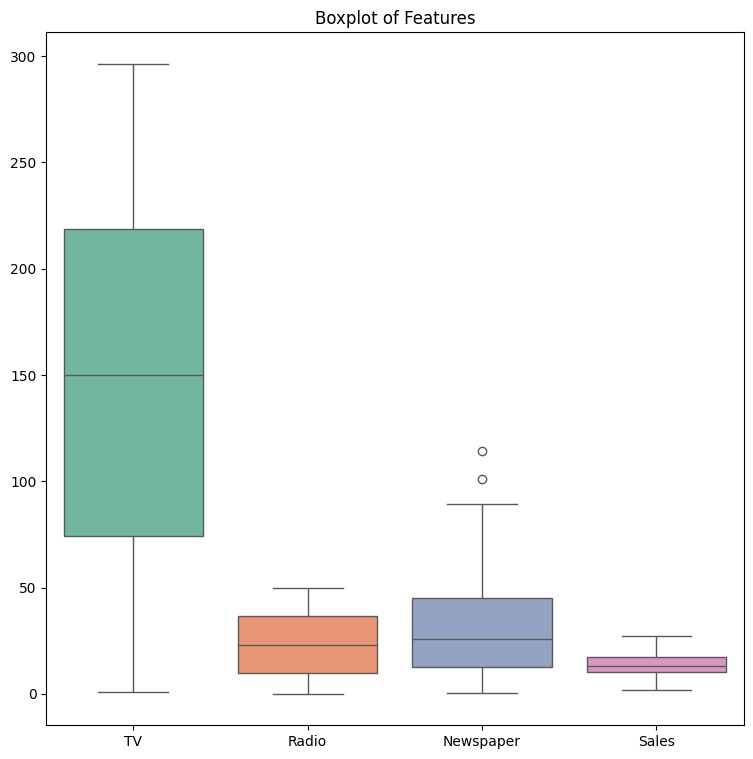

In [8]:
# Boxplots (outliers detection)
plt.figure(figsize=(9,9))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot of Features")

plt.show()

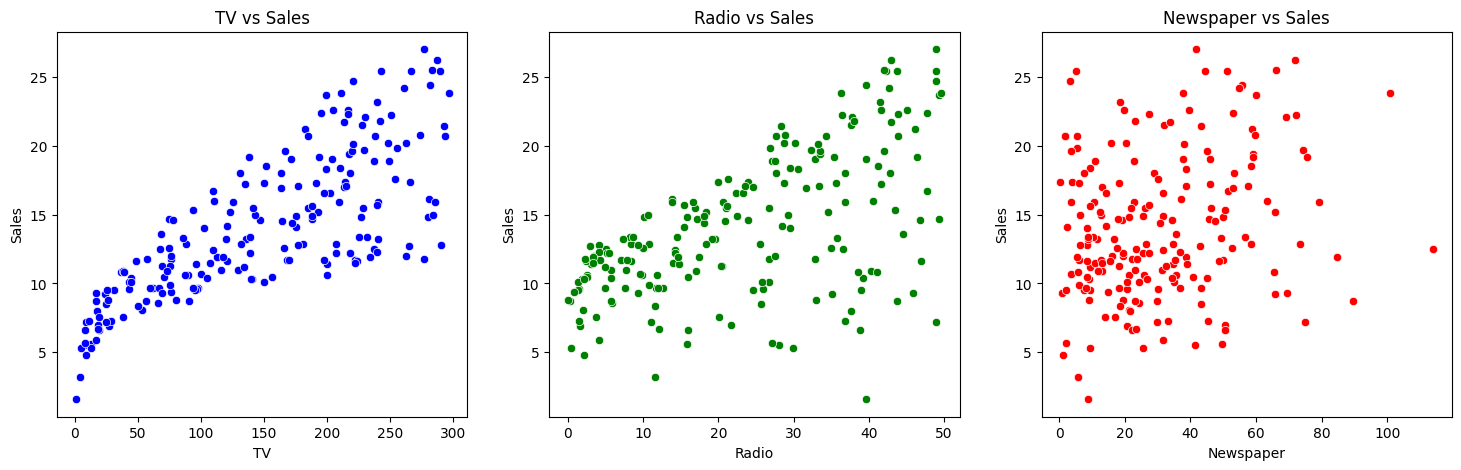

In [9]:
# Scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18,5))
sns.scatterplot(x='TV', y='Sales', data=df, ax=axs[0], color='blue')
sns.scatterplot(x='Radio', y='Sales', data=df, ax=axs[1], color='green')
sns.scatterplot(x='Newspaper', y='Sales', data=df, ax=axs[2], color='red')

axs[0].set_title("TV vs Sales")
axs[1].set_title("Radio vs Sales")
axs[2].set_title("Newspaper vs Sales")
plt.show()

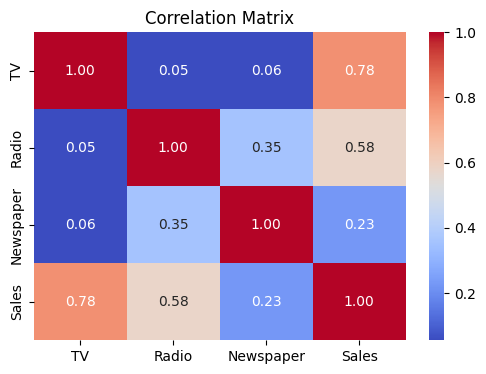

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("R² (Random Forest):", r2_score(y_test, y_pred_rf))
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_rf))

R² (Random Forest): 0.9812843792541843
MSE (Random Forest): 0.5907322499999988


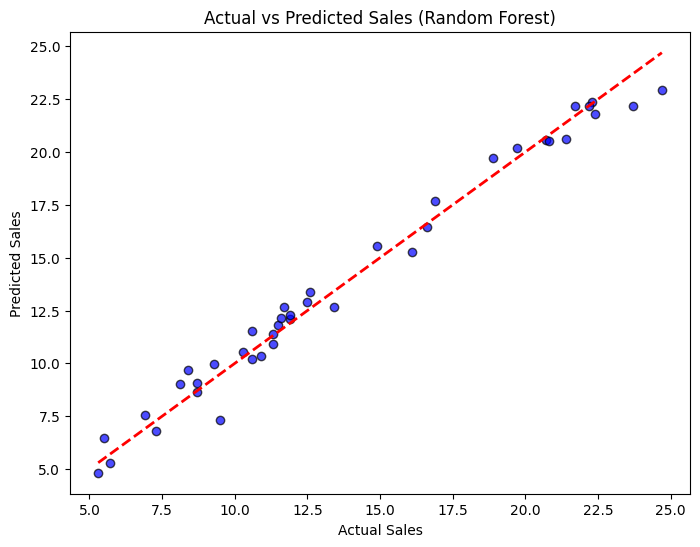

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="blue", edgecolor="k")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()

In [15]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions for Random Forest model
y_pred_rf_new = model.predict(X_test)

# Evaluation for Random Forest model
print("R² (Random Forest):", r2_score(y_test, y_pred_rf_new))
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_rf_new))

# Save model
joblib.dump(model, 'sales_model.pkl')
print("✅ Model saved as sales_model.pkl")

R² (Random Forest): 0.9812843792541843
MSE (Random Forest): 0.5907322499999988
✅ Model saved as sales_model.pkl


In [17]:
from google.colab import files
files.download('/content/sales_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
%%writefile app.py

import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('sales_model.pkl')

st.title("📊 Sales Prediction using Advertising Data")
st.write("Predict product sales based on advertising budget in different media channels.")

# Input features based on Advertising dataset columns
tv = st.number_input("TV Advertising Budget (in thousands)", min_value=0.0)
radio = st.number_input("Radio Advertising Budget (in thousands)", min_value=0.0)
newspaper = st.number_input("Newspaper Advertising Budget (in thousands)", min_value=0.0)

# Prepare data for prediction
features = np.array([[tv, radio, newspaper]])

if st.button("Predict Sales"):
    try:
        prediction = model.predict(features)[0]
        st.success(f"Predicted Sales: {prediction:.2f} units")
    except Exception as e:
        st.error(f"Prediction failed: {e}")

Writing app.py


In [19]:
!pip install -q streamlit pyngrok joblib

from pyngrok import ngrok

# 🔑 Add your ngrok auth token here
NGROK_AUTH_TOKEN = "your token"

# Authenticate
!ngrok authtoken $NGROK_AUTH_TOKEN

# Ensure all old tunnels are closed
ngrok.kill()

# Start a new random tunnel (no reserved subdomain)
public_url = ngrok.connect(8501)
print(f"🌐 Streamlit app is running publicly at: {public_url}")

# Start your Streamlit app quietly in background
!streamlit run app.py --server.port 8501 >/dev/null 2>&1 &


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.7 MB/s eta 0:00:00
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 Streamlit app is running publicly at: NgrokTunnel: "https://ladawn-tautologic-felice.ngrok-free.dev" -> "http://localhost:8501"
